In [1]:
t, s = var("t, s")

In [2]:
R = lambda t : exp(-0.5*(t))

In [3]:
R = lambda t : 0.8- 2.3*exp(-0.5*(t))

In [4]:
R = lambda t : t^2 * exp(-2.5*(t))

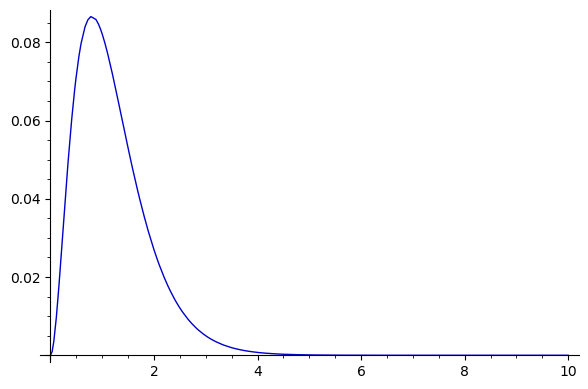

In [5]:
plot([R(t)],(t, 0, 10))

In [6]:
limit(R(t), t = Infinity)

0

In [7]:
laplace(R(t), t, s)

2/(s + 2.5)^3

In [8]:
laplace(R(t), t, s).denominator().expand()

s^3 + 7.5*s^2 + 18.75*s + 15.625

In [9]:
from IPython.display import display, Math, Latex

In [12]:
from sympy import integrate as sympy_integrate

alpha,beta = var("alpha,beta")


assume(alpha>0)
assume(alpha-beta>0)

w = lambda t, beta : exp(2*beta*t)

Generalized_Laguerre_Rodrigues = lambda n, alpha, beta, t : (sqrt(2*alpha) / factorial(n) * \
                                                             exp((alpha-beta)*t) * \
                                                             diff(exp(-2*alpha*t)*t^n, t, n)).factor()

Q = lambda F,k,alpha,beta : sympy_integrate(F(t=t) * \
                                            Generalized_Laguerre_Rodrigues(k, alpha, beta, t) * \
                                            w(t, beta), (t, 0, Infinity))

def det_Q(F, n, alpha, beta):
    m = [[Q(F, n+k1-k2, alpha, beta) for k2 in range (n+1)] for k1 in range (n+1)]
    return matrix(SR, m)

# https://www.pythonpool.com/gaussian-elimination-python/

#gaussian elimination of M_Q in symbolic form
def gaussian_elimination(n, M_Q):
    rows = n
    cols = n
    ma = [[] for _ in range(n)]

    for i in range(rows):# row
        for j in range(cols): # col
            ma[i] += [M_Q[i][j]]

    for i in range(cols):
        row_to_change = -1
        #ii_abs = abs(ma[i][i].subs(digit_values).subs(k_z_sol).n())
        ii_abs = abs(ma[i][i].n())

        for r in range(i+1, rows):
            #ri_abs = abs(ma[r][i].subs(digit_values).subs(k_z_sol).n())
            ri_abs = abs(ma[r][i].n())
            if ri_abs > ii_abs:
                row_to_change = r
                cur_abs = ri_abs
                print("row_to_change", row_to_change)

        if row_to_change > -1:
            for col in range(i, cols):#+1):
                tmp = ma[i][col]
                ma[i][col] = ma[row_to_change][col]
                ma[row_to_change][col] = tmp

        for j in range(i+1, rows):
            ratio = ma[j][i]/ma[i][i]

            for k in range(cols):#+1):
                ma[j][k] = ma[j][k] - ratio * ma[i][k]

    # Формирование верхнетреугольной матрицы
    # RU - Right Upper
    M_RU = matrix(ma)
    return M_RU

alpha_d = 2
beta_d = 1

n = 0

while(true):
    print("n", n)
    M_Q = det_Q(R, n, alpha_d, beta_d)
    print("M_Q", M_Q)
    det_M_Q = M_Q.det()
    print("det_M_Q", det_M_Q)
    #M_Q_RU = gaussian_elimination(n+1, M_Q)
    #display(Math(latex(M_Q_RU)))
    if abs(det_M_Q) < 1e-7:
        break
    n = n + 1

print("M_Q", M_Q)

beta_i = []
for i in range(n+1):
    exec("beta_i_" + str(i) + "= var('beta_i_" + str(i) + "')")
    exec("beta_i += [beta_i_" + str(i) +"]")

alpha_i = []
for i in range(n):
    exec("alpha_i_" + str(i) + "= var('alpha_i_" + str(i) + "')")
    exec("alpha_i += [alpha_i_" + str(i) +"]")

beta1_i = []
for i in range(1, n+1):
    exec("beta1_i += [beta_i_" + str(i) +"]")

vbeta_i = vector(beta_i)
vbeta1_i = vector(beta1_i)

#M_Q_RU_X = M_Q_RU*vbeta_i
M_Q_X = M_Q*vbeta_i

beta_i_0_d = 1

#M_Q_RU_B = []
#eq_sys_RU = []
#for i in range(n+1):
#    M_Q_RU_B_i = - (M_Q_RU_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
#    print(M_Q_RU_B_i)
#    M_Q_RU_B += [M_Q_RU_B_i]
#    eq_sys_RU += [M_Q_RU_X[i].subs(beta_i_0 == 0) == M_Q_RU_B_i]

#print("eq_sys_RU =", eq_sys_RU)
    
M_Q_B = []
eq_sys = []
for i in range(n+1):
    M_Q_B_i = - (M_Q_X[i]).coefficient(beta_i_0).n() * beta_i_0_d
    print(M_Q_B_i)
    M_Q_B += [M_Q_B_i]
    eq_sys += [M_Q_X[i].subs(beta_i_0 == 0) == M_Q_B_i]

print("eq_sys =", eq_sys)

def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

#eq_sys_RU_M = GenerateMatrix(eq_sys_RU, vbeta1_i)
eq_sys_M = GenerateMatrix(eq_sys, vbeta1_i)

#eq_sys_RU_M_sol = eq_sys_RU_M.solve_right(vector(M_Q_RU_B))
eq_sys_M_sol = eq_sys_M.solve_right(vector(M_Q_B))

#coeffs_beta_i = [beta_i_0 == beta_i_0_d]
#for i in range(n):
#    eq_sys_RU_M_sol_i = eq_sys_RU_M_sol[i]
#    print(eq_sys_RU_M_sol_i)
#    coeffs_beta_i += [vbeta1_i[i] == eq_sys_RU_M_sol_i]

coeffs_beta_i = [beta_i_0 == beta_i_0_d]
for i in range(n):
    eq_sys_M_sol_i = eq_sys_M_sol[i]
    print(eq_sys_M_sol_i)
    coeffs_beta_i += [vbeta1_i[i] == eq_sys_M_sol_i]

print("coeffs_beta_i =", coeffs_beta_i)
print("M_Q", M_Q)

valpha_i = []
for i in range(n):
    alpha__i = 0
    print(i)
    for j in range(0,i+1):
        print(j, M_Q[0][n-j], i-j, beta_i[i-j])
        alpha__i += M_Q[0][n-j] * beta_i[i-j]
    alpha__i *= sqrt(2 * alpha)
    valpha_i += [alpha_i[i] == alpha__i]

print("valpha_i =", valpha_i)

coeffs_alpha_i = []
for i in range(n):
    coeffs_alpha_i += [alpha_i[i] == valpha_i[i].rhs().subs(coeffs_beta_i).subs(alpha == alpha_d)]
print("coeffs_alpha_i =", coeffs_alpha_i)

delta, S = var("delta, S")
F_delta = sum([alpha_i[i]*delta^i for i in range(n)])/sum([beta_i[i]*delta^i for i in range(n+1)])
F_delta_d = F_delta.subs(coeffs_alpha_i).subs(coeffs_beta_i)
F_delta_d_1_delta_2_alpha = (1 - delta)/(2*alpha)*F_delta_d
F_delta_d_1_delta_2_alpha_d = F_delta_d_1_delta_2_alpha.subs(alpha == alpha_d)
print("F_delta_d_1_delta_2_alpha_d =", F_delta_d_1_delta_2_alpha_d)

F_S = F_delta_d_1_delta_2_alpha.subs(delta == (S - alpha + beta) / (S + alpha + beta)).factor()
F_S_d = F_S.subs(alpha == alpha_d, beta == beta_d)
print("F_S_d =", F_S_d)
display(Math(latex(F_S_d)))



if True:

    F_S_d_num = F_S_d.numerator()
    F_S_d_den = F_S_d.denominator()


    print("F_S_d_num =", F_S_d_num)
    display(Math(latex(F_S_d_num)))

    print("F_S_d_den =", F_S_d_den)
    display(Math(latex(F_S_d_den)))


    F_S_d_num_coefs = F_S_d_num.coefficients()
    F_S_d_den_coefs = F_S_d_den.coefficients()

    print("F_S_d_num_coefs =", F_S_d_num_coefs)
    print("F_S_d_den_coefs =", F_S_d_den_coefs)
    
    F_S_d_num_rec = 0
    for coef, pw in F_S_d_num_coefs:
        if abs(coef) > 1e-8:
            F_S_d_num_rec += coef * S^pw

    F_S_d_den_rec = 0
    for coef, pw in F_S_d_den_coefs:
        if abs(coef) > 1e-8:
            F_S_d_den_rec += coef * S^pw


    print("F_S_d_num_rec =", F_S_d_num_rec)
    display(Math(latex(F_S_d_num_rec)))

    print("F_S_d_den_rec =", F_S_d_den_rec)
    display(Math(latex(F_S_d_den_rec)))

    F_S_d_rec = F_S_d_num_rec / F_S_d_den_rec
    print("F_S_d_rec =", F_S_d_rec)
    display(Math(latex(F_S_d_rec)))
    
    exec(preparse("rec_R = lambda t :" + str(inverse_laplace(F_S_d_rec, S, t))))
else:
    exec(preparse("rec_R = lambda t :" + str(inverse_laplace(F_S_d, S, t))))
    

print("")
try:
    print("rec_R(t) =", rec_R(t))
except Exception as ex:
    print(ex)
print("R(t) =", R(t))

n 0
M_Q [0.0932944606413994]
det_M_Q 0.0932944606413994
n 1
M_Q [-0.226572261557684 0.0932944606413994]
[ 0.184684952698280 -0.226572261557684]
det_M_Q 0.0341049066567952
n 2
M_Q [  0.184684952698280  -0.226572261557684  0.0932944606413994]
[-0.0655509184098459   0.184684952698280  -0.226572261557684]
[ 0.0174465692744645 -0.0655509184098459   0.184684952698280]
det_M_Q 0.00180933613477357
n 3
M_Q [ -0.0655509184098459    0.184684952698280   -0.226572261557684   0.0932944606413994]
[  0.0174465692744645  -0.0655509184098459    0.184684952698280   -0.226572261557684]
[-0.00400221967766079   0.0174465692744645  -0.0655509184098459    0.184684952698280]
[0.000838190251490900 -0.00400221967766079   0.0174465692744645  -0.0655509184098459]
det_M_Q 4.108109794183357e-18
M_Q [ -0.0655509184098459    0.184684952698280   -0.226572261557684   0.0932944606413994]
[  0.0174465692744645  -0.0655509184098459    0.184684952698280   -0.226572261557684]
[-0.00400221967766079   0.0174465692744645  -0.06

<IPython.core.display.Math object>

F_S_d_num = (1.66533453693773e-15)*S^2 - (1.57651669496772e-14)*S + 2.98542274052480


<IPython.core.display.Math object>

F_S_d_den = 1.49271137026235*S^3 + 11.1953352769678*S^2 + 27.9883381924198*S + 23.3236151603500


<IPython.core.display.Math object>

F_S_d_num_coefs = [[2.98542274052480, 0], [-1.57651669496772e-14, 1], [1.66533453693773e-15, 2]]
F_S_d_den_coefs = [[23.3236151603500, 0], [27.9883381924198, 1], [11.1953352769678, 2], [1.49271137026235, 3]]
F_S_d_num_rec = 2.98542274052480


<IPython.core.display.Math object>

F_S_d_den_rec = 1.49271137026235*S^3 + 11.1953352769678*S^2 + 27.9883381924198*S + 23.3236151603500


<IPython.core.display.Math object>

F_S_d_rec = 2.98542274052480/(1.49271137026235*S^3 + 11.1953352769678*S^2 + 27.9883381924198*S + 23.3236151603500)


<IPython.core.display.Math object>


name 'ilt' is not defined
R(t) = t^2*e^(-2.50000000000000*t)


In [14]:
try:
    print(limit(rec_R(t), t=Infinity))
except Exception as ex:
    print(ex)

name 'ilt' is not defined


In [15]:
laplace(R(t), t, s).denominator().expand()*2.98542274052480/2

1.49271137026240*s^3 + 11.195335276968*s^2 + 27.98833819242*s + 23.32361516035

In [ ]:
n

In [ ]:
plot([rec_R(t), R(t)],(t, 0, 10))